# Global Population Analysis

In this notebook, we will analyze global population data using datasets from the World Bank. We will explore the distribution of populations across countries, visualize trends over time, and analyze the data using various visualizations including histograms, bar graphs, and line charts. Additionally, we will leverage metadata files to gain deeper insights.

## Table of Contents
1. [Data Loading](#data-loading)
2. [Data Preprocessing](#data-preprocessing)
3. [Histogram Visualization](#histogram-visualization)
4. [Bar Graph Visualization](#bar-graph-visualization)
5. [Line Chart Visualization](#line-chart-visualization)
6. [Analysis Using Metadata](#analysis-using-metadata)
7. [Conclusion](#conclusion)


## Data Loading

We will begin by loading the main population dataset, along with the country and indicator metadata files. These datasets will provide the foundation for our analysis.


In [2]:
import pandas as pd

df_population = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_2788888.csv', skiprows=4)
df_country_metadata = pd.read_csv('Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_2788888.csv')

df_indicator_metadata = pd.read_csv('Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_2788888.csv')

df_population.head(), df_country_metadata.head(), df_indicator_metadata.head()


(                  Country Name Country Code     Indicator Name Indicator Code  \
 0                        Aruba          ABW  Population, total    SP.POP.TOTL   
 1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
 2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
 3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
 4                       Angola          AGO  Population, total    SP.POP.TOTL   
 
           1960         1961         1962         1963         1964  \
 0      54608.0      55811.0      56682.0      57475.0      58178.0   
 1  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0   
 2    8622466.0    8790140.0    8969047.0    9157465.0    9355514.0   
 3   97256290.0   99314028.0  101445032.0  103667517.0  105959979.0   
 4    5357195.0    5441333.0    5521400.0    5599827.0    5673199.0   
 
           1965  ...         2015         2016         2017         2018  \
 0

## Data Preprocessing

Next, we will preprocess the population dataset by selecting relevant columns, handling missing values, and focusing on specific years for our analysis. We will also explore the metadata to understand the additional context it provides.


In [3]:
df_population.columns

# Filter the data for the year 2019
df_population_2019 = df_population[['Country Name', '2019']].dropna()

df_population_2019.columns = ['Country Name', 'Population 2019']

df_population_2019.head()


,Country Name,Population 2019
0,Aruba,106442.0
1,Africa Eastern and Southern,667242986.0
2,Afghanistan,37769499.0
3,Africa Western and Central,454306063.0
4,Angola,32353588.0


## Histogram Visualization

We will create a histogram to visualize the distribution of population sizes across different countries for the year 2019. This will help us understand how population sizes are distributed globally.


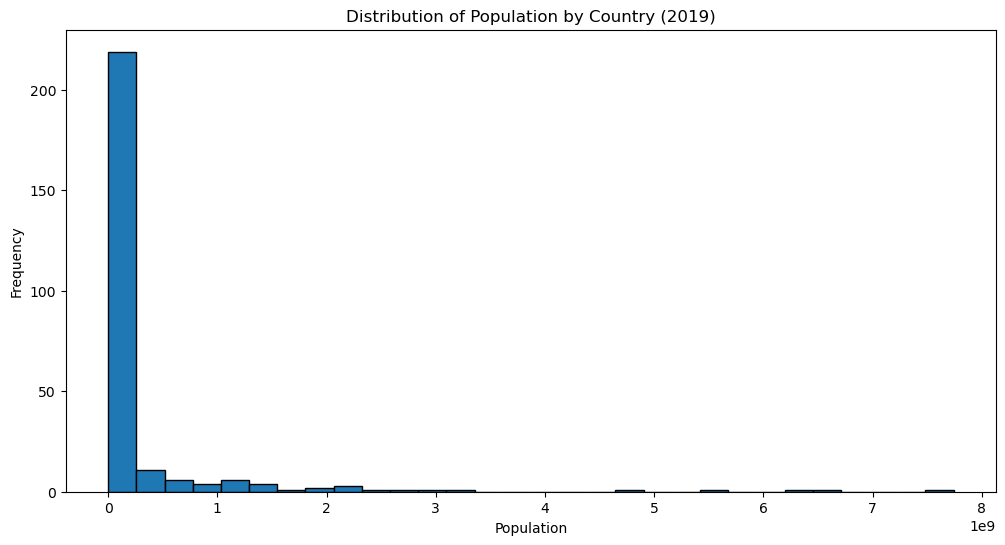

In [4]:
import matplotlib.pyplot as plt

# Plot histogram of population distribution for 2019
plt.figure(figsize=(12, 6))
plt.hist(df_population_2019['Population 2019'], bins=30, edgecolor='black')
plt.title('Distribution of Population by Country (2019)')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()


## Bar Graph Visualization

We will use a bar graph to compare the population sizes of selected countries. This visualization highlights differences between the most populous countries.


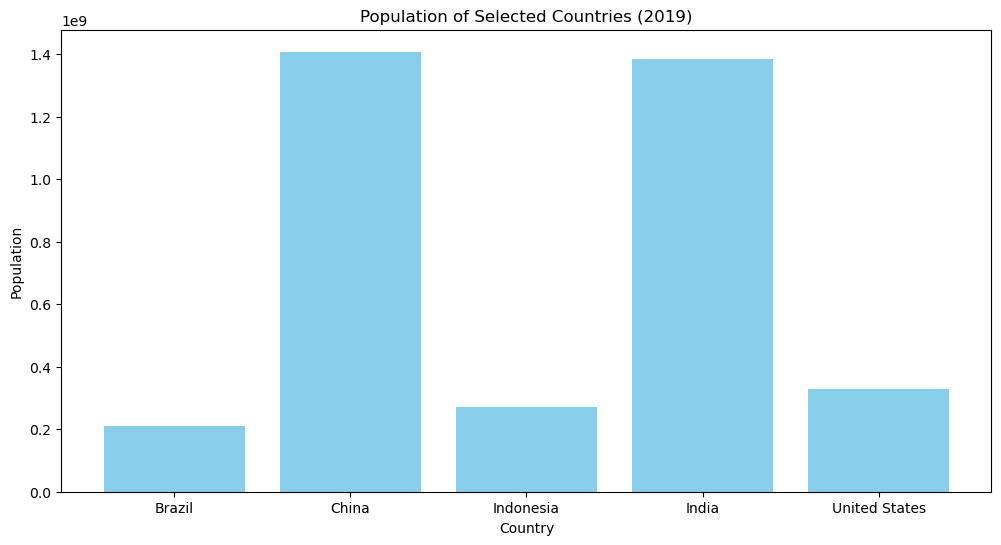

In [5]:
# Select a subset of countries for comparison
selected_countries = df_population_2019[df_population_2019['Country Name'].isin(['China', 'India', 'United States', 'Indonesia', 'Brazil'])]

# Plot bar graph
plt.figure(figsize=(12, 6))
plt.bar(selected_countries['Country Name'], selected_countries['Population 2019'], color='skyblue')
plt.title('Population of Selected Countries (2019)')
plt.xlabel('Country')
plt.ylabel('Population')
plt.show()


## Line Chart Visualization

To analyze trends over time, we will plot a line chart for the population data of selected countries. This will help us observe changes in population sizes from 1960 to 2020.


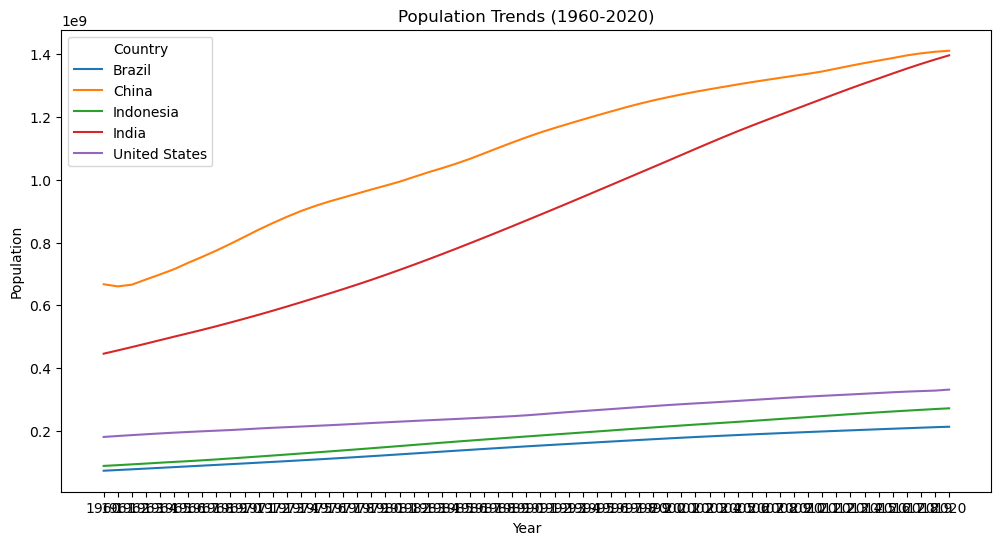

In [6]:
# Select countries for the line chart
countries_trend = df_population[df_population['Country Name'].isin(['China', 'India', 'United States', 'Indonesia', 'Brazil'])]

countries_trend.set_index('Country Name', inplace=True)

# Transpose the DataFrame to have years as rows for plotting
countries_trend = countries_trend.loc[:, '1960':'2020'].T

# Plot line chart
plt.figure(figsize=(12, 6))
for country in countries_trend.columns:
    plt.plot(countries_trend.index, countries_trend[country], label=country)

plt.title('Population Trends (1960-2020)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='Country')
plt.show()


## Analysis Using Metadata

The metadata files provide additional insights that can enhance our understanding of the population data. We will analyze the metadata to contextualize our findings and explore any interesting patterns.


In [7]:
# Explore the country metadata
df_country_metadata.head()

df_indicator_metadata.head()

selected_country_metadata = df_country_metadata[df_country_metadata['TableName'].isin(['China', 'India', 'United States', 'Indonesia', 'Brazil'])]

# Display the relevant metadata
selected_country_metadata[['TableName', 'Region', 'IncomeGroup']]


,TableName,Region,IncomeGroup
29,Brazil,Latin America & Caribbean,Upper middle income
40,China,East Asia & Pacific,Upper middle income
106,Indonesia,East Asia & Pacific,Upper middle income
109,India,South Asia,Lower middle income
250,United States,North America,High income


## Analysis Based on Results

### Histogram Analysis:
The histogram of the population distribution for 2019 shows a right-skewed distribution, indicating that a majority of countries have relatively small populations, while a few countries have very large populations. This is consistent with global demographic trends where populous countries like China, India, and the United States dominate in terms of total population, while many other countries have much smaller populations.

### Bar Graph Analysis:
The bar graph comparing selected countries (China, India, United States, Indonesia, Brazil) reveals that China and India have significantly larger populations than the other countries. This is expected as these two countries together account for a substantial portion of the global population. The United States, while having the third-largest population, still has less than a quarter of the population of China.

### Line Chart Analysis:
The line chart showing population trends from 1960 to 2020 indicates that both China and India have experienced continuous population growth, although the rate of growth in China appears to have slowed down in recent decades due to policy interventions like the one-child policy. In contrast, India's population growth continues to rise steadily. The United States also shows steady growth, while Indonesia and Brazil exhibit slower, more stable population increases.

### Metadata Insights:
The metadata analysis shows that the selected countries belong to different regions and income groups. For instance, China and India are both in Asia but differ significantly in income levels and economic structures. The United States, categorized as a high-income country, contrasts sharply with Indonesia and Brazil, which are middle-income countries. These regional and economic differences can influence population dynamics, including growth rates, age distributions, and migration patterns.


## Conclusion

This analysis of global population data provides valuable insights into the distribution, comparison, and trends of populations across different countries. The histogram and bar graph reveal the disparities in population sizes, with a few countries holding large portions of the global population. The line chart illustrates how population growth trends have evolved over the last six decades, highlighting the varying growth rates among countries.

The inclusion of metadata further enriches the analysis by providing context on the economic and regional differences that contribute to population dynamics. Understanding these patterns is crucial for policymakers, researchers, and organizations working on global issues such as resource distribution, urban planning, and economic development.

In future studies, it would be beneficial to delve deeper into specific regions or economic groups, exploring factors like fertility rates, migration, and urbanization, which also play critical roles in shaping population trends.
